<img src='./img/intel-logo.png' width=50%>

# 인텔코리아 객체인식 강의자료 4강
<font size=5><b>(Convert Tensorflow to OpenVINO)<b></font>

<div align='right'> 이 인 구 (Ike Lee) </div>
<div align='right'> 성 민 석 (Minsuk Sung) </div>
<div align='right'> 류 회 성 (Hoesung Ryu) </div>

<h1>강의목차<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#OpenVINO" data-toc-modified-id="OpenVINO-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>OpenVINO</a></span></li><li><span><a href="#Convert-Tensorflow(pb)-to-OpenVINO(xml,bin)" data-toc-modified-id="Convert-Tensorflow(pb)-to-OpenVINO(xml,bin)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Convert Tensorflow(pb) to OpenVINO(xml,bin)</a></span></li><li><span><a href="#OpenVINO에서-xml,bin파일로-추론" data-toc-modified-id="OpenVINO에서-xml,bin파일로-추론-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>OpenVINO에서 xml,bin파일로 추론</a></span><ul class="toc-item"><li><span><a href="#Import-Library" data-toc-modified-id="Import-Library-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Import Library</a></span></li><li><span><a href="#Load-xml,bin-files" data-toc-modified-id="Load-xml,bin-files-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Load xml,bin files</a></span></li><li><span><a href="#Load-IENetwork" data-toc-modified-id="Load-IENetwork-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Load IENetwork</a></span></li><li><span><a href="#Inference-(Image)" data-toc-modified-id="Inference-(Image)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Inference (Image)</a></span></li><li><span><a href="#Inference-(Video)" data-toc-modified-id="Inference-(Video)-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Inference (Video)</a></span></li></ul></li><li><span><a href="#Reference" data-toc-modified-id="Reference-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Reference</a></span></li></ul></div>

---

## OpenVINO

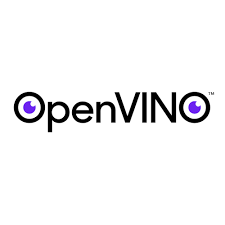

지금까지는 Google의 Deep Learning Framework였던 Tensorflow를 통해서 Object Detection을 진행해봤습니다. 이번 튜토리얼에서는 Intel에서 제공하는 Open Framework 중 하나인 `OpenVINO`를 통해 Object Detection을 진행해보도록 하겠습니다. 진행하기에 앞서 여기에서 사용된 버전은 아래와 같습니다.

> **OpenVINO**: 2.0.0  
> **Tensorflow**: 1.14.0  
> **Networkx**: 2.3.0

![](https://cdn-images-1.medium.com/max/1000/1*1Tud0TqDvQwHWbxjRt3K5g.png)

이 두 라이브러리의 버전이 아닌 서로 다른 버전을 사용할 경우, 본 튜토리얼을 원할하게 진행할 수 없습니다. 특히 Tensorflow 2.0.0 이상의 버전을 사용하고 계신 경우는 현재 OpenVINO 버전과 호환되지 않음을 밝힙니다.

---

## Convert Tensorflow(pb) to OpenVINO(xml,bin)

![](https://hypraptive.github.io/assets/optimized-inference-edge/openvino-toolkit.png)

In [1]:
# 변환하는데 20초 정도 걸림
%run /opt/intel/openvino/deployment_tools/model_optimizer/mo_tf.py \
    -m models/freeze/frozen_inference_graph.pb \
    --transformations_config /opt/intel/openvino/deployment_tools/model_optimizer/extensions/front/tf/ssd_support_api_v1.15.json \
    --tensorflow_object_detection_api_pipeline_config models/freeze/pipeline.config \
    --input_shape [1,300,300,3] \
    --reverse_input_channels \
    --data_type FP16 \
    --output_dir models/openvino

Model Optimizer arguments:
Common parameters:
	- Path to the Input Model: 	/home/intel/Desktop/intel-object-detection-final/models/freeze/frozen_inference_graph.pb
	- Path for generated IR: 	/home/intel/Desktop/intel-object-detection-final/models/openvino
	- IR output name: 	frozen_inference_graph
	- Log level: 	ERROR
	- Batch: 	Not specified, inherited from the model
	- Input layers: 	Not specified, inherited from the model
	- Output layers: 	Not specified, inherited from the model
	- Input shapes: 	[1,300,300,3]
	- Mean values: 	Not specified
	- Scale values: 	Not specified
	- Scale factor: 	Not specified
	- Precision of IR: 	FP16
	- Enable fusing: 	True
	- Enable grouped convolutions fusing: 	True
	- Move mean values to preprocess section: 	False
	- Reverse input channels: 	True
TensorFlow specific parameters:
	- Input model in text protobuf format: 	False
	- Path to model dump for TensorBoard: 	None
	- List of shared libraries with TensorFlow custom layers implementation: 	None
	- 

/home/intel/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/intel/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/intel/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/intel/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:519: Futu

The Preprocessor block has been removed. Only nodes performing mean value subtraction and scaling (if applicable) are kept.

[ SUCCESS ] Generated IR version 10 model.
[ SUCCESS ] XML file: /home/intel/Desktop/intel-object-detection-final/models/openvino/frozen_inference_graph.xml
[ SUCCESS ] BIN file: /home/intel/Desktop/intel-object-detection-final/models/openvino/frozen_inference_graph.bin
[ SUCCESS ] Total execution time: 31.49 seconds. 
[ SUCCESS ] Memory consumed: 570 MB. 


---

## OpenVINO에서 xml,bin파일로 추론

<img src='https://software.intel.com/sites/default/files/managed/b7/e3/webops12032-diagram-of-flow-750.jpg'>

### 단일 이미지 추론하기

In [10]:
%run /home/intel/Desktop/intel-object-detection-final/utils/object_detection_sample_ssd.py \
    -m /home/intel/Desktop/intel-object-detection-final/models/openvino/frozen_inference_graph.xml \
    -i /home/intel/Desktop/intel-object-detection-final/img/test_pet/beagle_197.jpg

        CPU
        MKLDNNPlugin version ......... 2.1
        Build ........... 42025
[0,2] element, prob = 0.429893    (52,50)-(252,236) batch id : 0
[1,5] element, prob = 0.981877    (47,55)-(252,245) batch id : 0 WILL BE PRINTED!


### 실시간 추론해보기

In [1]:
%run /home/intel/Desktop/intel-object-detection-final/utils/object_detection_sample_ssd_realtime.py

/home/intel/Desktop/intel-object-detection-final/utils/object_detection_sample_ssd_realtime.py:9: DeprecationWarning: IEPlugin class is deprecated. Please use IECore class instead.
  plugin = IEPlugin("GPU", "/opt/intel/openvino/deployment_tools/inference_engine/lib/intel64")
/home/intel/Desktop/intel-object-detection-final/utils/object_detection_sample_ssd_realtime.py:18: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)


Loading network files:
	/home/intel/Desktop/intel-object-detection-final/models/openvino/frozen_inference_graph.xml
	/home/intel/Desktop/intel-object-detection-final/models/openvino/frozen_inference_graph.bin
detect: beagle, 0.98095703125
detect: beagle, 0.9658203125
detect: beagle, 0.9580078125
detect: beagle, 0.916015625
detect: beagle, 0.9697265625
detect: beagle, 0.947265625
detect: beagle, 0.99609375
detect: beagle, 0.998046875
detect: beagle, 0.94970703125
detect: beagle, 0.998046875
detect: beagle, 0.9931640625
detect: beagle, 0.9990234375
detect: beagle, 0.9970703125
detect: beagle, 0.998046875
detect: beagle, 0.998046875
detect: beagle, 0.9990234375
detect: beagle, 0.998046875
detect: beagle, 0.9990234375
detect: beagle, 0.998046875
detect: beagle, 0.998046875
detect: beagle, 0.9970703125
detect: beagle, 0.998046875
detect: beagle, 0.99609375
detect: beagle, 0.998046875
detect: beagle, 0.998046875
detect: beagle, 0.998046875
detect: beagle, 0.9970703125
detect: beagle, 0.99804

detect: american_pit_bull_terrier, 0.94482421875
detect: beagle, 0.9990234375
detect: american_pit_bull_terrier, 0.9541015625
detect: beagle, 0.9990234375
detect: american_pit_bull_terrier, 0.97802734375
detect: beagle, 0.9990234375
detect: american_pit_bull_terrier, 0.97412109375
detect: beagle, 0.9990234375
detect: american_pit_bull_terrier, 0.96533203125
detect: beagle, 0.9990234375
detect: american_pit_bull_terrier, 0.9931640625
detect: beagle, 0.9990234375
detect: american_pit_bull_terrier, 0.984375
detect: beagle, 0.9990234375
detect: american_pit_bull_terrier, 0.97998046875
detect: beagle, 0.9990234375
detect: american_pit_bull_terrier, 0.9892578125
detect: beagle, 0.9990234375
detect: american_pit_bull_terrier, 0.9853515625
detect: beagle, 0.998046875
detect: american_pit_bull_terrier, 0.9912109375
detect: beagle, 0.998046875
detect: american_pit_bull_terrier, 0.9970703125
detect: beagle, 0.9990234375
detect: american_pit_bull_terrier, 0.99609375
detect: beagle, 0.998046875
det

detect: american_pit_bull_terrier, 0.98095703125
detect: beagle, 1.0
detect: american_pit_bull_terrier, 0.9091796875
detect: beagle, 1.0
detect: beagle, 0.94287109375
detect: beagle, 0.9990234375
detect: beagle, 0.9853515625
detect: beagle, 0.9990234375
detect: beagle, 0.9921875
detect: beagle, 0.9990234375
detect: beagle, 0.9931640625
detect: beagle, 0.9990234375
detect: beagle, 0.986328125
detect: beagle, 1.0
detect: beagle, 0.97900390625
detect: beagle, 1.0
detect: beagle, 0.96533203125
detect: american_pit_bull_terrier, 0.9658203125
detect: beagle, 1.0
detect: american_pit_bull_terrier, 0.95263671875
detect: beagle, 1.0
detect: beagle, 0.91259765625
detect: beagle, 1.0
detect: beagle, 0.97412109375
detect: american_pit_bull_terrier, 0.90283203125
detect: beagle, 1.0
detect: beagle, 0.9580078125
detect: american_pit_bull_terrier, 0.9697265625
detect: beagle, 1.0
detect: american_pit_bull_terrier, 0.9658203125
detect: beagle, 1.0
detect: beagle, 1.0
detect: beagle, 0.97998046875
dete

detect: american_pit_bull_terrier, 0.9853515625
detect: beagle, 0.99609375
detect: american_pit_bull_terrier, 0.9716796875
detect: beagle, 0.99609375
detect: american_pit_bull_terrier, 0.98291015625
detect: beagle, 0.9970703125
detect: american_pit_bull_terrier, 0.97607421875
detect: beagle, 0.99609375
detect: american_pit_bull_terrier, 0.966796875
detect: beagle, 0.9931640625
detect: american_pit_bull_terrier, 0.994140625
detect: beagle, 0.9921875
detect: american_pit_bull_terrier, 0.9580078125
detect: beagle, 0.9912109375
detect: american_pit_bull_terrier, 0.96142578125
detect: beagle, 0.9921875
detect: american_pit_bull_terrier, 0.97607421875
detect: beagle, 0.9912109375
detect: beagle, 0.9912109375
detect: american_pit_bull_terrier, 0.9716796875
detect: beagle, 0.9873046875
detect: american_pit_bull_terrier, 0.98095703125
detect: beagle, 0.97802734375
detect: american_pit_bull_terrier, 0.98388671875
detect: beagle, 0.92431640625
detect: american_pit_bull_terrier, 0.96044921875
dete

detect: samoyed, 0.966796875
detect: samoyed, 0.93017578125
detect: samoyed, 0.96044921875
detect: samoyed, 0.93701171875
detect: samoyed, 0.984375
detect: samoyed, 0.94287109375
detect: samoyed, 0.98388671875
detect: samoyed, 0.98291015625
detect: samoyed, 0.99609375
detect: samoyed, 0.9951171875
detect: samoyed, 0.9970703125
detect: samoyed, 0.994140625
detect: samoyed, 0.998046875
detect: samoyed, 0.994140625
detect: samoyed, 0.998046875
detect: samoyed, 0.994140625
detect: samoyed, 0.9970703125
detect: samoyed, 0.9921875
detect: samoyed, 0.98828125
detect: samoyed, 0.98388671875
detect: samoyed, 0.9951171875
detect: samoyed, 0.9951171875
detect: samoyed, 0.9970703125
detect: samoyed, 0.99609375
detect: samoyed, 0.99609375
detect: samoyed, 0.9912109375
detect: samoyed, 0.9970703125
detect: samoyed, 0.99609375
detect: samoyed, 0.998046875
detect: samoyed, 0.9970703125
detect: samoyed, 0.9970703125
detect: samoyed, 0.99609375
detect: samoyed, 0.9970703125
detect: samoyed, 0.9951171875

detect: samoyed, 0.998046875
detect: samoyed, 0.97509765625
detect: samoyed, 0.9990234375
detect: samoyed, 0.97412109375
detect: samoyed, 0.9990234375
detect: samoyed, 0.97265625
detect: samoyed, 0.9990234375
detect: samoyed, 0.97998046875
detect: samoyed, 0.9990234375
detect: samoyed, 0.990234375
detect: samoyed, 0.9990234375
detect: samoyed, 0.98828125
detect: samoyed, 0.9990234375
detect: samoyed, 0.986328125
detect: samoyed, 0.9990234375
detect: samoyed, 0.97998046875
detect: samoyed, 0.9970703125
detect: samoyed, 0.98095703125
detect: samoyed, 0.9951171875
detect: samoyed, 0.9873046875
detect: samoyed, 0.99609375
detect: samoyed, 0.9892578125
detect: samoyed, 0.9912109375
detect: samoyed, 0.98388671875
detect: samoyed, 0.990234375
detect: samoyed, 0.986328125
detect: samoyed, 0.990234375
detect: samoyed, 0.984375
detect: samoyed, 0.9912109375
detect: samoyed, 0.9853515625
detect: samoyed, 0.9951171875
detect: samoyed, 0.98095703125
detect: samoyed, 0.99609375
detect: samoyed, 0.98

detect: samoyed, 0.998046875
detect: samoyed, 0.98291015625
detect: samoyed, 0.9990234375
detect: samoyed, 0.98388671875
detect: samoyed, 0.9990234375
detect: samoyed, 0.990234375
detect: samoyed, 0.998046875
detect: samoyed, 0.9912109375
detect: samoyed, 0.998046875
detect: samoyed, 0.9951171875
detect: samoyed, 0.998046875
detect: samoyed, 0.9921875
detect: samoyed, 0.9990234375
detect: samoyed, 0.9912109375
detect: samoyed, 0.9970703125
detect: samoyed, 0.9970703125
detect: samoyed, 0.998046875
detect: samoyed, 0.9970703125
detect: samoyed, 0.998046875
detect: samoyed, 0.998046875
detect: samoyed, 0.998046875
detect: samoyed, 0.99609375
detect: samoyed, 0.998046875
detect: samoyed, 0.99609375
detect: samoyed, 0.998046875
detect: samoyed, 0.99609375
detect: samoyed, 0.998046875
detect: samoyed, 0.998046875
detect: samoyed, 0.998046875
detect: samoyed, 0.9970703125
detect: samoyed, 0.9990234375
detect: samoyed, 0.9970703125
detect: samoyed, 0.9990234375
detect: samoyed, 0.998046875
de

detect: samoyed, 0.99609375
detect: samoyed, 0.9951171875
detect: samoyed, 0.9970703125
detect: samoyed, 0.99609375
detect: samoyed, 0.9970703125
detect: samoyed, 0.99609375
detect: samoyed, 0.998046875
detect: samoyed, 0.9970703125
detect: samoyed, 0.998046875
detect: samoyed, 0.9970703125
detect: samoyed, 0.998046875
detect: samoyed, 0.9970703125
detect: samoyed, 0.998046875
detect: samoyed, 0.9970703125
detect: samoyed, 0.998046875
detect: samoyed, 0.9970703125
detect: samoyed, 0.998046875
detect: samoyed, 0.9970703125
detect: samoyed, 0.998046875
detect: samoyed, 0.9970703125
detect: samoyed, 0.998046875
detect: samoyed, 0.9970703125
detect: samoyed, 0.998046875
detect: samoyed, 0.9970703125
detect: samoyed, 0.9970703125
detect: samoyed, 0.9970703125
detect: samoyed, 0.998046875
detect: samoyed, 0.998046875
detect: samoyed, 0.998046875
detect: samoyed, 0.998046875
detect: samoyed, 0.9970703125
detect: samoyed, 0.9970703125
detect: samoyed, 0.998046875
detect: samoyed, 0.99609375
de

detect: american_pit_bull_terrier, 0.96533203125
detect: beagle, 0.96533203125
detect: american_pit_bull_terrier, 0.986328125
detect: american_pit_bull_terrier, 0.9912109375
detect: beagle, 0.98095703125
detect: american_pit_bull_terrier, 0.99609375
detect: beagle, 0.97607421875
detect: american_pit_bull_terrier, 0.9970703125
detect: beagle, 0.9951171875
detect: american_pit_bull_terrier, 0.9912109375
detect: beagle, 0.9912109375
detect: american_pit_bull_terrier, 0.98291015625
detect: beagle, 0.994140625
detect: american_pit_bull_terrier, 0.994140625
detect: beagle, 0.96142578125
detect: american_pit_bull_terrier, 0.99609375
detect: american_pit_bull_terrier, 0.900390625
detect: american_pit_bull_terrier, 0.97900390625
detect: beagle, 0.90771484375
detect: american_pit_bull_terrier, 0.9912109375
detect: beagle, 0.966796875
detect: american_pit_bull_terrier, 0.998046875
detect: beagle, 0.9892578125
detect: american_pit_bull_terrier, 0.998046875
detect: beagle, 0.9931640625
detect: amer

detect: samoyed, 0.900390625
detect: samoyed, 0.921875
detect: samoyed, 0.93359375
detect: samoyed, 0.96142578125
detect: samoyed, 0.9326171875
detect: samoyed, 0.97265625
detect: samoyed, 0.9931640625
detect: samoyed, 0.98193359375
detect: samoyed, 0.9248046875
detect: samoyed, 0.97265625
detect: samoyed, 0.9912109375
detect: samoyed, 0.97900390625
detect: samoyed, 0.97900390625
detect: samoyed, 0.9375
detect: samoyed, 0.92822265625
detect: samoyed, 0.92333984375
detect: samoyed, 0.916015625
detect: samoyed, 0.927734375
detect: samoyed, 0.9013671875
detect: samoyed, 0.90478515625
detect: samoyed, 0.96337890625
detect: samoyed, 0.95947265625
detect: samoyed, 0.95947265625
detect: samoyed, 0.966796875
detect: samoyed, 0.970703125
detect: samoyed, 0.97802734375
detect: samoyed, 0.931640625
detect: samoyed, 0.9384765625
detect: samoyed, 0.97705078125
detect: samoyed, 0.984375
detect: samoyed, 0.9921875
detect: samoyed, 0.95703125
detect: samoyed, 0.970703125
detect: samoyed, 0.9677734375


KeyboardInterrupt: 

- https://www.intel.co.kr/
- https://software.intel.com/en-us/openvino-toolkit